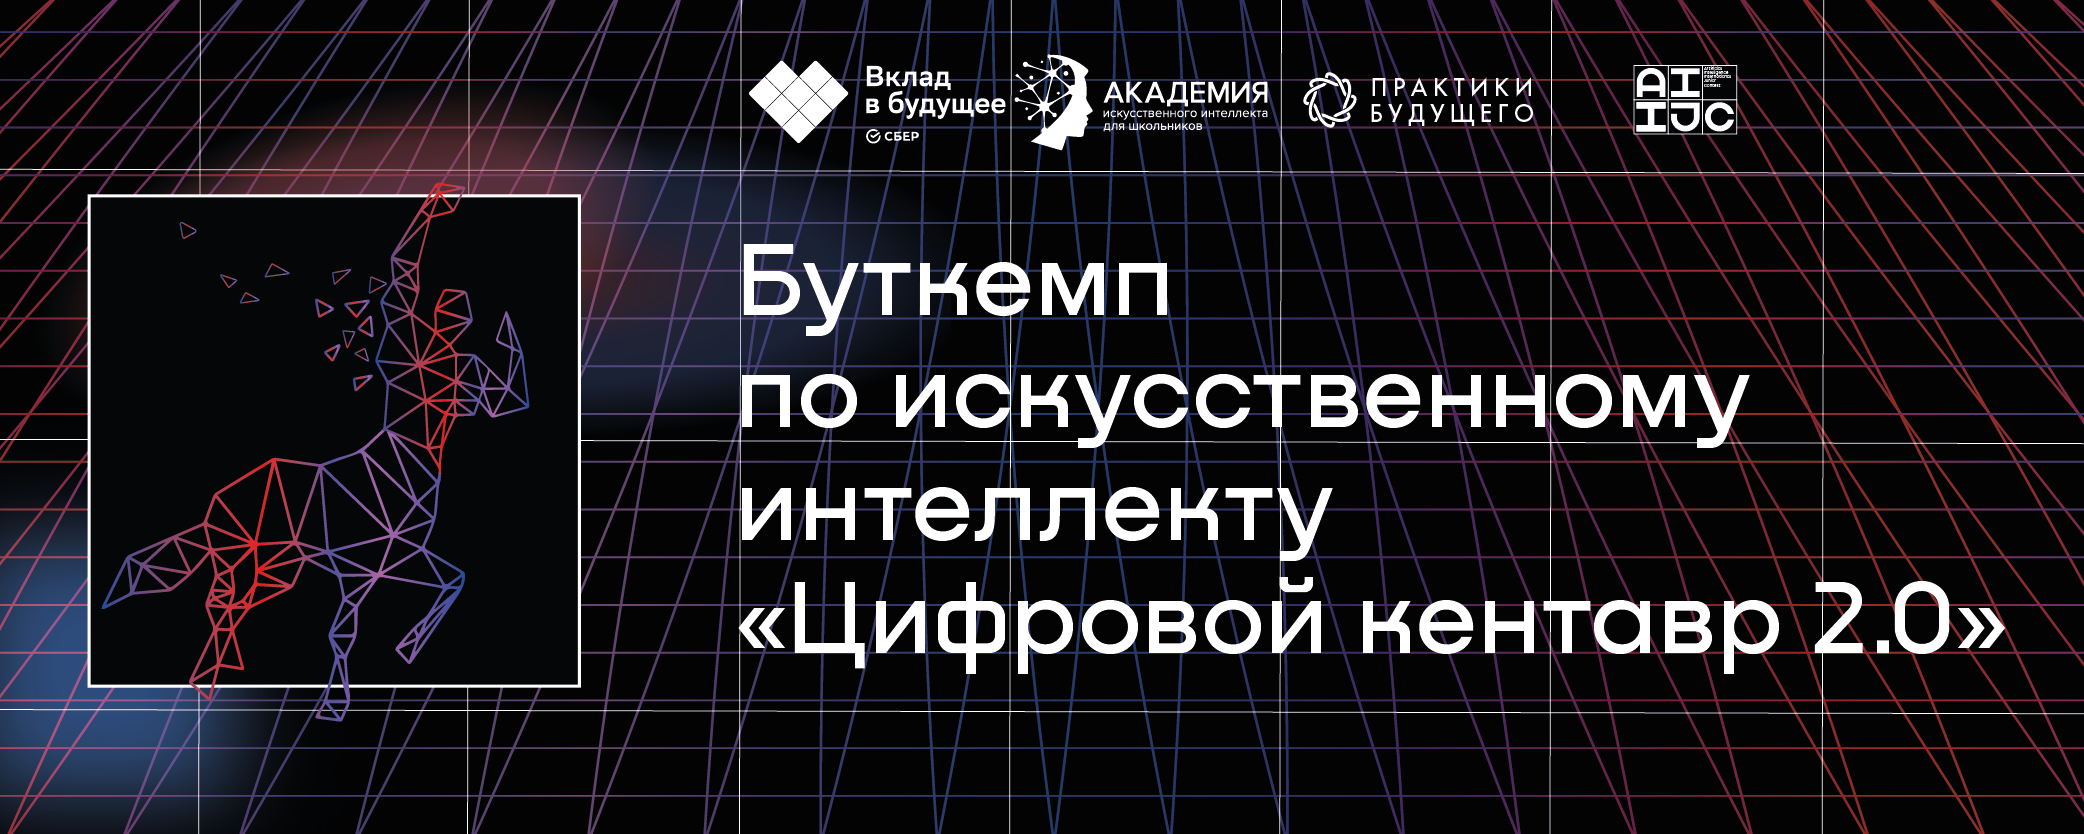

##Введение в Pytorch

В [прошлом практическом уроке](https://stepik.org/lesson/754024/step/1?unit=755948) вы работали с библиотекой Keras для создания своей первой нейронной сети. Там вы работали с датасетом [MNIST](https://en.wikipedia.org/wiki/MNIST_database) и распознавали рукописные числа. Надеемся, что это помогло вам составить общие представления о библиотеке, обучить нейросеть и понять то, как вообще работают нейросети. Однако, в 2017 году Keras перестал поддерживаться в качестве самостоятельной библиотеки и стал частью [TensorFlow](https://www.tensorflow.org/). Поэтому перед тем, как переходить к глубокому обучению и свёрточным нейронным сетям давайте поговорим о более актуальной библиотеке: Pytorch. В этому нотбуке мы разберём типы данных библиотеки, и потренируемся в нейросетях с тем же дадасетом MNIST. 

Рекомендуем вам сравить две библиотеки и разобрать самые заметные отличия!

Присутпим к работе с импорта библиотеки.

In [1]:
import torch

https://pytorch.org/docs/stable/index.html - это ссылка на официальную документацию. Если вам не хватит какой-то информации в этом нотубке, то можете всегда обратиться сюда.

Основа работы Pytorch - тензоры. Подробнее можете прочитать по [ссылке](http://mathprofi.com/messages/746-Tenzory-dlya-chainikov.html), но если в 2-х словах, то тензоры - многомерные матрицы. Давайте создадим такой.

In [58]:
torch.zeros([2, 8])

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

Давайте теперь создадим многомерную матрицу: матрицу, которая состоит из нескольких "слоёв". Здесь у нас будет 5 матриц рамезмера 2 на 2, которые состоят из единиц.

In [60]:
torch.ones([5, 2, 2])

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

А вот так мы можем создать совершенно произольный тензор, просто передав в него некий list.

In [61]:
torch.Tensor([[1,  2,  3,  4],
              [5,  6,  7,  8]])

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

И мы можем записать его в переменную, с которой сможем дальше работать.

In [66]:
x = torch.Tensor([[1,  2,  3,  4],
                  [5,  6,  7,  8],
                  [9, 10, 11, 12]])

Мы можем узнать характеристике тензора в переменной двумя достаточно интуитивными способами.

In [67]:
x.size()

torch.Size([3, 4])

In [68]:
x.shape

torch.Size([3, 4])

А теперь давате попробуем извлечь из нашего тензора какие-то конкертные данные. Например, посмотрим содержимое первой строки...

In [69]:
x[0]

tensor([1., 2., 3., 4.])

... или второй строки, при этом обращая внимание на организацию индексации.

In [70]:
x[1]

tensor([5., 6., 7., 8.])

А вот так мы можем узнать содержимое конкртеного элемента, обратившись к нему по индексу.

In [71]:
x[0, 0]

tensor(1.)

Также мы можем поработать со срезами. Здесь мы получим все значения первого столбца.

In [72]:
x[:, 0]

tensor([1., 5., 9.])

Мы можем выполнять с тензорами различные арифметические операции. Здесь попробуйте поэксперементировать, потому что здесь показано далеко не всё, что с тензорами возможно делать. 

In [12]:
x + 10

tensor([[11., 12., 13., 14.],
        [15., 16., 17., 18.],
        [19., 20., 21., 22.]])

In [73]:
x ** 2

tensor([[  1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.],
        [ 81., 100., 121., 144.]])

In [74]:
y = torch.Tensor([[12, 11, 10, 9],
                  [8, 7, 6, 5],
                  [4, 3, 2, 1]])

In [75]:
x + y

tensor([[13., 13., 13., 13.],
        [13., 13., 13., 13.],
        [13., 13., 13., 13.]])

In [76]:
x * y

tensor([[12., 22., 30., 36.],
        [40., 42., 42., 40.],
        [36., 30., 22., 12.]])

Мы также можем применять для тензоров некоторые условия, что делается крайне просто и интересно. Ниже мы, например, узнаём какие из значений тензора больше или равны пяти.

In [78]:
x >= 5

tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [79]:
mask = x >= 5

In [80]:
x[mask]

tensor([ 5.,  6.,  7.,  8.,  9., 10., 11., 12.])

А теперь будем предельно внимательными! Обращаем внимание на копирование тензоров. Например, здесь мы копируем в y тензор x. Но это будет не копирование в прямом смысле слова! Это будет ссылка на другой тензор. Поэтому внося изменения в казалось бы копию, мы на самом деле меняем оба тензора.

In [21]:
y = x
y[0, 0] = 999
print(x)
print(y)

tensor([[999.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.]])
tensor([[999.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.]])


Для того, чтобы скопировать тезнор необходимо сделать всё немного по-другому. 

In [22]:
x = torch.Tensor([[1,  2,  3,  4],
                  [5,  6,  7,  8],
                  [9, 10, 11, 12]])

In [23]:
y = x.clone()
y[0, 0] = 999
print(x)
print(y)

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
tensor([[999.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.]])


Теперь всё получилось! Теперь перейдём к рассмотрению типов данных. Ниже мы узнаём тип данных, которые лежат у нас в тензоре X. Обнаружим, что все они типа float.

In [24]:
x.dtype

torch.float32

Теперь попробуем немного поэкспеременитировать и поменять типы.

In [25]:
x = x.double()
print(x)
x = x.int()
print(x)
x = x.float()
print(x)

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], dtype=torch.float64)
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]], dtype=torch.int32)
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])


Если вам будет не хватать каких-то функций, то вы всегда можете обратиться к нашей более привычной библиотеке NumPy, которая хорошо работает вместе с PyTorch. 

In [26]:
import numpy as np
x = np.array([[1, 2, 3, 4],
              [4, 3, 2, 1]])
x

array([[1, 2, 3, 4],
       [4, 3, 2, 1]])

Мы можем создать тензор из NumPy array!

In [27]:
x = torch.from_numpy(x)
x

tensor([[1, 2, 3, 4],
        [4, 3, 2, 1]])

In [28]:
x = x.numpy()
x

array([[1, 2, 3, 4],
       [4, 3, 2, 1]])

Также есть приятный бонус: вы можете создавать произввольный тензор!

In [82]:
x = torch.rand([2000,3000])
x

tensor([[0.1927, 0.7527, 0.0601,  ..., 0.6633, 0.0924, 0.2922],
        [0.9381, 0.7848, 0.6090,  ..., 0.7866, 0.8403, 0.8638],
        [0.0247, 0.1589, 0.9261,  ..., 0.7848, 0.4783, 0.3265],
        ...,
        [0.5561, 0.3260, 0.7520,  ..., 0.3310, 0.5787, 0.4163],
        [0.5603, 0.4681, 0.4213,  ..., 0.3720, 0.8866, 0.8099],
        [0.1206, 0.1145, 0.2626,  ..., 0.4100, 0.9224, 0.7395]])

Теперь давайте обучим нейросеть при помощи Pytorch, используя датасет MNIST. 

In [30]:
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



Запишем наши тензоры в переменные, не забыв указать размеры батчей и где необходимо перемешав данные. Размер батча - то, с чем вы можете "поиграть", попробовав выставить свои значения.

In [31]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

Проверим, что наши данные загрузились корректно.

In [32]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [33]:
X, y = data[0][0], data[1][0]

При помощи Matplotlib сделаем визуализацию.

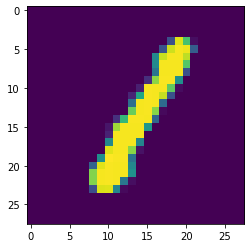

In [34]:
import matplotlib.pyplot as plt  # pip install matplotlib

plt.imshow(data[0][0].view(28,28))
plt.show()

А теперь приступим к созданию нейросети.

In [35]:
import torch.nn as nn
import torch.nn.functional as F

In [36]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

net = Net()
print(net)

Net()


In [37]:
class a:
    '''Роидтельский класс'''
    def __init__(self):
        print("initializing a")

class b(a):
    '''Наследуюется от класса a, но не запускается как метод init'''
    def __init__(self):
        print("initializing b")

class c(a):
    '''Наследуюется от класса a, но запускается как метод init'''
    def __init__(self):
        super().__init__()
        print("initializing c")

b_ob = b()

initializing b


In [38]:
c_ob = c()

initializing a
initializing c


Попробуем начать создавать слои и проверим, что всё работает.

In [39]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [40]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [41]:
X = torch.randn((28,28))

In [42]:
X = X.view(-1,28*28)

In [43]:
output = net(X)

In [44]:
output

tensor([[-2.3470, -2.2703, -2.3010, -2.4283, -2.3585, -2.3845, -2.3164, -2.2588,
         -2.1876, -2.2007]], grad_fn=<LogSoftmaxBackward0>)

In [45]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [46]:
for epoch in range(3): 
    for data in trainset:  
        X, y = data 
        net.zero_grad()  
        output = net(X.view(-1,784))  
        loss = F.nll_loss(output, y)  
        loss.backward()  
        optimizer.step()  
    print(loss)  

tensor(0.0327, grad_fn=<NllLossBackward0>)
tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.0204, grad_fn=<NllLossBackward0>)


In [47]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))


Accuracy:  0.966


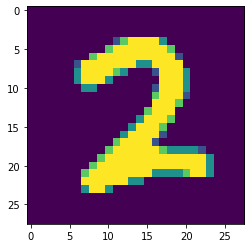

In [53]:
import matplotlib.pyplot as plt

plt.imshow(X[5].view(28,28))
plt.show()

In [55]:
print(torch.argmax(net(X[5].view(-1,784))[0]))

tensor(2)


Проверим работоспособность нашей сети!

In [56]:
a_featureset = X[5]
reshaped_for_network = a_featureset.view(-1,784)
output = net(reshaped_for_network) 
first_pred = output[0]
print(first_pred)

tensor([-2.0874e+01, -1.5742e+01, -1.9329e-03, -6.2668e+00, -2.4485e+01,
        -2.1065e+01, -2.4654e+01, -1.3741e+01, -1.0369e+01, -2.5872e+01],
       grad_fn=<SelectBackward0>)


In [57]:
biggest_index = torch.argmax(first_pred)
print(biggest_index)

tensor(2)


Пожалуйста, сравните этот ноутбук с аналогичным решением с библиотекой Keras и сделайте выводы!